# Comparison of genetic variant frequencies between populations

This analysis aimed to answer the following questions: 

1. How do frequencies of variants in the HIE genes of interest compare between African ethnolinguistic subpopulation groups?
2. How do frequencies of variants in the HIE genes of interest compare between Africans and European, Asian and Latin American populations?

To achieve this, the following steps were performed: 

1. Variant frequency data for African populations (in-house) and global populations (ALFA) were collected and stored as DataFrame objects for analysis.
2. The correlation of variant allele frequencies among African ethnolinguistic groups was calculated and visualised.
3. The correlation of variant allele frequencies between African and European, Asian, and Latin American populations was also calculated and visualised.
4. Significant frequency differences between African and European, Asian, and Latin American populations were identified using two-tailed Fisher's Exact Tests, with Bonferroni correction applied for multiple comparisons.

## Imports

Import relevant libraries and packages

In [1]:
import os
import sys
import warnings

from dotenv import load_dotenv
import itertools

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import register_cmap

Turn off warning notifications

In [2]:
warnings.filterwarnings("ignore")

Set plot parameters

In [3]:
plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

## Data loading

Load the processed African variant count data from the `Data/Processed/IH_allele_counts.csv` file. This file includes the following information:

* `ID`: A unique variant identifier.
* `VAR_NAME`: The non-unique name of the variant.
* `POS`: The nucleotide position at which the genetic variant is located within the genome.
* `ALT` and `REF`: An allele refers to the different forms of a specific variant that can exist at a particular genetic position. For each variant, there are two alleles, the normal form known as the reference allele (REF), and the altered form known as the alternate allele (ALT). These alleles define the genetic variation at a given position.
* `GENE`: The gene in which the variant is located.
* `SUB_POP`: The African ethnolinguistic subpopulation from which the genetic data sample originated.
* `IH_ALT_CTS`: This shows how many times each genetic variant's alternate allele (ALT) appears in all the samples of a population.
* `IH_TOTAL_CTS`: This provides the overall count of all genetic variants' alleles (both REF and ALT) mentioned in the data.
* `IH_REF_CTS`: This shows how many times each genetic variant's reference allele form (REF) appears in all the samples of a population.
* `REG`: The regional classification of the sample's ethnolinguistic group. The possible regions are:
  - Central Africa (CA)
  - Southern Africa (SA)
  - Eastern Africa (EA)
  - Western Africa (WA)
* `IH_AF`: The frequency of the variant's alternate allele in all samples of the population.
* `VARIANT_TYPE`: The type of variant. The possible types are:
    - INDEL
    - SNP

In [4]:
ih_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
)

ih_data.head(5)

,ID,VAR_NAME,VARIANT_TYPE,CHROM,POS,REF,ALT,GENE,SUB_POP,REG,IH_REF_CTS,IH_ALT_CTS,IH_TOTAL_CTS,IH_AF
0,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Bantu Kenya,EA,20,0,20,0.0
1,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Yoruba,WA,276,0,276,0.0
2,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,San,SA,12,0,12,0.0
3,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mende,WA,166,0,166,0.0
4,110148882_C_CT,chr13:110148882C-CT,INDEL,13,110148882,C,CT,COL4A1,Mbuti Pygmy,CA,24,0,24,0.0


Load the processed variant count data from ALFA on European, Asian and Latin American populations from the `Data/Processed/ALFA_allele_counts.csv` file. The file contains the following information:

* `VAR_NAME`: Name or identifier of the genetic variant.
* `REF`: Reference allele (original allele).
* `ALT`: Alternate allele (mutated allele).
* `ALT_CT_ALFA_East Asian`: Count of the alternate allele in the East Asian population (ALFA database).
* `ALT_CT_ALFA_European`: Count of the alternate allele in the European population (ALFA database).
* `ALT_CT_ALFA_Latin American 1`: Count of the alternate allele in the Latin American 1 population (ALFA database).
* `ALT_CT_ALFA_Latin American 2`: Count of the alternate allele in the Latin American 2 population (ALFA database).
* `ALT_CT_ALFA_South Asian`: Count of the alternate allele in the South Asian population (ALFA database).
* `REF_CT_ALFA_East Asian`: Count of the reference allele in the East Asian population (ALFA database).
* `REF_CT_ALFA_European`: Count of the reference allele in the European population (ALFA database).
* `REF_CT_ALFA_Latin American 1`: Count of the reference allele in the Latin American 1 population (ALFA database).
* `REF_CT_ALFA_Latin American 2`: Count of the reference allele in the Latin American 2 population (ALFA database).
* `REF_CT_ALFA_South Asian`: Count of the reference allele in the South Asian population (ALFA database).

In [5]:
alfa_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts.csv",
    )
)

alfa_data.head(5)

,VAR_NAME,REF,ALT,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian,ALFA_AF_East Asian,ALFA_AF_South Asian,ALFA_AF_European,ALFA_AF_Latin American 1,ALFA_AF_Latin American 2
0,rs1000343,C,T,0.0,49.0,5.0,10.0,0.0,490.0,109377.0,673.0,2200.0,184.0,0.000000,0.000000,0.000448,0.007375,0.004525
1,rs1000989,T,C,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0,0.335366,0.339171,0.365720,0.310606,0.393258
2,rs1000990,T,C,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0,0.372093,0.367347,0.374843,0.273973,0.427869
3,rs1005573,C,T,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0,0.336538,0.718182,0.683346,0.706081,0.654375
4,rs1007311,A,G,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0,0.500000,0.438776,0.448813,0.417808,0.252459


## Analysis and Visualisation

### Correlation in variant allele frequencies between African ethnolinguistic subpopulations

Compute the correlation in allele frequencies between each pair of comparison subpopulations using variants found in all ethnolinguistic subpopulations.

In [6]:
# Transform the data into a suitable format for analysis
ih_data_subpop_pivot = ih_data.pivot_table(index=['ID'], columns=['SUB_POP'], values='IH_AF')

# Remove variants that are absent from one or more ethnolinguistic groups. 
ih_data_subpop_filtered = ih_data_subpop_pivot.replace(0, np.NaN)
ih_data_subpop_filtered = ih_data_subpop_filtered.dropna()

# Define comparison populations
populations = ["Bantu Kenya", "Bantu South Africa", "Biaka Pygmy", "Esan", "Luhya", "Mandenka", "Mandinka", "Mbuti Pygmy", "Mende", "San", "Yoruba"]

# Calculate allele frequency correlations
comparison_frequencies = np.log10(ih_data_subpop_filtered[populations])
frequency_correlation_matrix = comparison_frequencies.corr()

Visualise the correlation matrix

Variants present in all ethnolinguistic groups: 1144
Correlation in allele frequency for variants present in all ethnolinguistic groups:


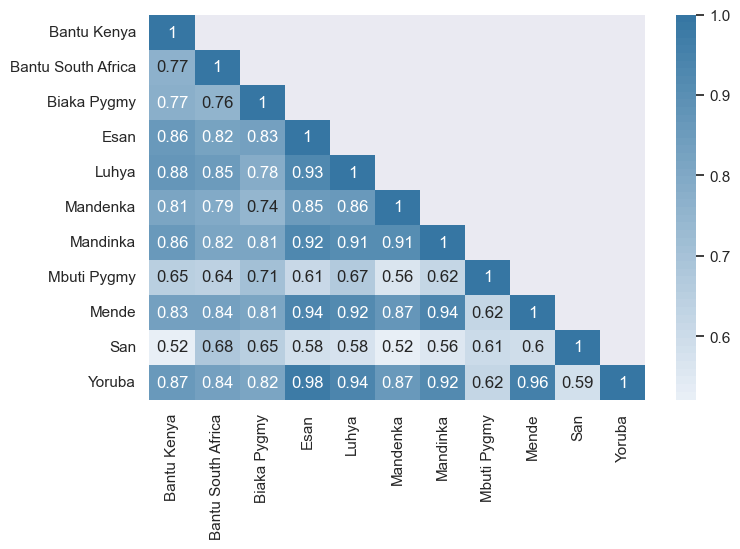

In [7]:
# Set figure size
sns.set(rc={"figure.figsize": (8, 5)})

# Create a mask to remove the upper half of the correlation matrix
mask = np.triu(np.ones_like(frequency_correlation_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Create a custom gradient color palette
pos = [0.0,1.0]
colors=['#ECF1F8','#3274A1']
cmap = LinearSegmentedColormap.from_list("", list(zip(pos, colors)))
register_cmap("c_cmap8", cmap)
palette= sns.color_palette("c_cmap8",n_colors=50)

# Construct a heatmap to visualise the correlation matrix. Apply the mask.
sns.heatmap(frequency_correlation_matrix, annot=True, mask=mask, cmap=palette)

# Set labels
plt.xlabel(None)
plt.ylabel(None)

# Save figure
plt.savefig(
    "..\Results\Figures\5a-Variant_frequency_correlation_plot_ethnolinguistic_comparison.png",
    dpi=1200,
    bbox_inches="tight",
)

print(f"Variants present in all ethnolinguistic groups: {ih_data_subpop_filtered.reset_index().ID.nunique()}")
print(f"Correlation in allele frequency for variants present in all ethnolinguistic groups:")
plt.show()

### Correlation in variant allele frequencies between African, European, Asian and Latin American populations

Compute the correlation in allele frequencies between each pair of comparison populations using variants found in all global populations.

In [8]:
# Transform In-House African data into a suitable format for analysis
ih_data_global_pivot = ih_data[ih_data.REG == "Recent African"].pivot_table(
    index=["VAR_NAME", "REF", "ALT"],
    columns=["REG"],
    values=["IH_AF", "IH_REF_CTS", "IH_ALT_CTS"],
)
ih_data_global_pivot.columns = ih_data_global_pivot.columns.droplevel(1)
ih_data_global_pivot.rename(
    columns={
        "IH_AF": "IH_AF_Recent African",
        "IH_ALT_CTS": "ALT_CT_IH_Recent African",
        "IH_REF_CTS": "REF_CT_IH_Recent African",
    },
    inplace=True,
)

# Merge in data from ALFA on European, Asian and Latin American populations
ih_alfa_data = ih_data_global_pivot.merge(
    alfa_data, how="left", on=["VAR_NAME", "REF", "ALT"]
)
ih_alfa_data.rename(columns={"Recent African": "IH_AF_Recent African"})

# Remove variants that are absent from one or more global population groups.
ih_alfa_data_freq_filtered = ih_alfa_data.replace(0, np.NaN)
ih_alfa_data_freq_filtered.dropna(how="any", axis=0, inplace=True)

# Drop unnecessary columns
ih_alfa_data_freq_filtered.drop(
    columns=[
        "ALT_CT_IH_Recent African",
        "ALT_CT_ALFA_East Asian",
        "ALT_CT_ALFA_South Asian",
        "ALT_CT_ALFA_European",
        "ALT_CT_ALFA_Latin American 1",
        "ALT_CT_ALFA_Latin American 2",
        "REF_CT_IH_Recent African",
        "REF_CT_ALFA_East Asian",
        "REF_CT_ALFA_South Asian",
        "REF_CT_ALFA_European",
        "REF_CT_ALFA_Latin American 1",
        "REF_CT_ALFA_Latin American 2",
    ],
    inplace=True,
)

# Define comparison populations
comparison_populations = [
    ["IH_AF_Recent African", "IH_AF_Recent African"],
    ["IH_AF_Recent African", "ALFA_AF_Latin American 1"],
    ["IH_AF_Recent African", "ALFA_AF_Latin American 2"],
    ["IH_AF_Recent African", "ALFA_AF_European"],
    ["IH_AF_Recent African", "ALFA_AF_East Asian"],
    ["IH_AF_Recent African", "ALFA_AF_South Asian"],
]

# Calculate allele frequency correlations
comparison_frequencies = np.log10(ih_alfa_data_freq_filtered.iloc[:, 3:])
frequency_correlation_matrix = comparison_frequencies.corr()
correlation_matrix_rename_dict = {
    "IH_AF_Recent African": "AFR",
    "ALFA_AF_European": "EUR",
    "ALFA_AF_East Asian": "EAS",
    "ALFA_AF_South Asian": "SAS",
    "ALFA_AF_Latin American 1": "AMR1",
    "ALFA_AF_Latin American 2": "AMR2",
}
frequency_correlation_matrix.rename(
    columns=correlation_matrix_rename_dict,
    index=correlation_matrix_rename_dict,
    inplace=True,
)

Visualise the correlation matrix

Variants present in all global population groups: 1072
Correlation in allele frequency for variants present in all global population groups:


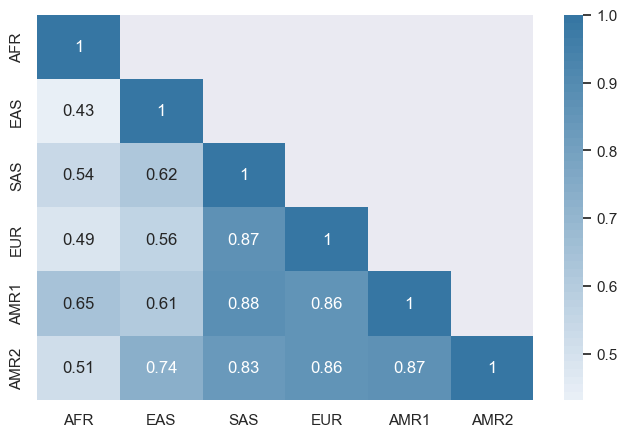

In [9]:
# Set figure size
sns.set(rc={"figure.figsize": (8, 5)})

# Create a mask to remove the upper half of the correlation matrix
mask = np.triu(np.ones_like(frequency_correlation_matrix, dtype=bool))
np.fill_diagonal(mask, False)

# Construct a heatmap to visualise the correlation matrix. Apply the mask.
sns.heatmap(frequency_correlation_matrix, annot=True, mask=mask, cmap=palette)

# Set labels
plt.xlabel(None)
plt.ylabel(None)

# Save figure
plt.savefig(
    "..\Results\Figures\5b-Variant_frequency_correlation_plot_global_comparison.png",
    dpi=1200,
    bbox_inches="tight",
)

print(f"Variants present in all global population groups: {ih_alfa_data_freq_filtered.reset_index().VAR_NAME.nunique()}")
print(f"Correlation in allele frequency for variants present in all global population groups:")
plt.show()

### Significant differences in variant allele counts between African, and European, Asian and Latin American populations

Prepare the data for hypothesis testing

In [10]:
# Remove variants that are absent from one or more global population groups.
ih_alfa_data_cts_filtered = ih_alfa_data.replace(0, np.NaN)
ih_alfa_data_cts_filtered.dropna(how="any", axis=0, inplace=True)

# Drop unnecessary columns
ih_alfa_data_cts_filtered.drop(
    columns=[
        "IH_AF_Recent African",
        "ALFA_AF_East Asian",
        "ALFA_AF_South Asian",
        "ALFA_AF_European",
        "ALFA_AF_Latin American 1",
        "ALFA_AF_Latin American 2"
    ],
    inplace=True,
)

# Save results
ih_alfa_data_cts_filtered.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "5a-Allele_counts_for_Fishers.csv",
    ),
    index=False,
)

ih_alfa_data_cts_filtered.head(5)

,VAR_NAME,REF,ALT,ALT_CT_IH_Recent African,REF_CT_IH_Recent African,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,ALT_CT_ALFA_Latin American 2,ALT_CT_ALFA_South Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_South Asian
7990,rs1000989,T,C,320.0,900.0,55.0,21489.0,123.0,1330.0,1685.0,109.0,37269.0,273.0,2052.0,3283.0
7991,rs1000990,T,C,317.0,903.0,32.0,5355.0,40.0,261.0,36.0,54.0,8931.0,106.0,349.0,62.0
7992,rs1005573,C,T,1061.0,159.0,35.0,10693.0,209.0,1810.0,79.0,69.0,4955.0,87.0,956.0,31.0
7993,rs1007311,A,G,691.0,529.0,56.0,9154.0,61.0,154.0,43.0,56.0,11242.0,85.0,456.0,55.0
7994,rs1008140,T,C,278.0,942.0,18.0,829.0,12.0,13.0,1.0,126.0,39989.0,156.0,687.0,113.0


Perform a two-tailed Fisher's Exact Test to determine if population differences in allele frequencies for variants are statistically significant 

In [11]:
# Define comparison populations
comparison_populations = [
    ("IH_Recent African", "ALFA_East Asian"),
    ("IH_Recent African", "ALFA_South Asian"),
    ("IH_Recent African", "ALFA_European"),
    ("IH_Recent African", "ALFA_Latin American 1"),
    ("IH_Recent African", "ALFA_Latin American 2"),
]

# Calculate fisher's exact odds ratios and p-values for each variant for the different population combination
fishers_results = functions.fishers_test(
    ih_alfa_data_cts_filtered.replace(np.NAN, 0), comparison_populations
)
fishers_results.reset_index(drop=True, inplace=True)

# Save results
fishers_results.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "5b-Fishers_results_not_corrected.csv",
    ),
    index=False,
)

fishers_results.head(5)

,VAR_NAME,REF,ALT,PVALUE_IH_Recent African_ALFA_East Asian,OR_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_South Asian,OR_IH_Recent African_ALFA_South Asian,PVALUE_IH_Recent African_ALFA_European,OR_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_Latin American 1,OR_IH_Recent African_ALFA_Latin American 1,PVALUE_IH_Recent African_ALFA_Latin American 2,OR_IH_Recent African_ALFA_Latin American 2
0,rs1000989,T,C,4.994184e-02,0.704646,2.047839e-07,0.692753,2.877260e-14,0.616650,6.936673e-02,0.789160,1.252062e-16,0.548571
1,rs1000990,T,C,3.130879e-02,0.592400,2.422944e-02,0.604590,2.934688e-16,0.585480,6.914875e-01,0.930288,6.839954e-13,0.469414
2,rs1005573,C,T,6.040086e-32,13.155256,8.363288e-05,2.618502,1.570940e-48,3.092163,1.168116e-10,2.777738,2.324018e-48,3.524501
3,rs1007311,A,G,1.960058e-01,1.306238,1.520092e-02,1.670770,1.369937e-15,1.604187,7.848065e-04,1.820168,5.575761e-38,3.867822
4,rs1008140,T,C,3.781790e-03,2.065817,2.852421e-11,33.348195,1.870364e-181,14.235735,4.673196e-07,3.836518,1.382575e-43,15.595786


Since multiple Fisher's Tests were performed, the p-values need to be corrected for multiple testing. Perform this correction using the Bonferroni method.

In [27]:
# Generate a list with column names for all subpopulation p-values in the fishers_results dataframe
p_value_combinations_list = []
for combination in comparison_populations:
    first_pop = combination[0]
    second_pop = combination[1]
    p_value_combinations = "PVALUE_{}_{}".format(first_pop, second_pop)
    p_value_combinations_list.append(p_value_combinations)

# Correct for multiple testing for the entire dataset
corr_fishers_results = functions.multipletest_correction_wholedf(
    fishers_results, p_value_combinations_list, 0.05, "bonferroni"
)

# Include the odds ratio results
fishers_or_results = fishers_results[
    fishers_results.columns[fishers_results.columns.str.contains("OR")]
]
corr_fishers_results = pd.concat([corr_fishers_results, fishers_or_results], axis=1)

# Save results
corr_fishers_results.to_csv(
    os.path.join(
        PROJECT_ROOT,
        "Results",
        "Tables",
        "5c-Fishers_results_bonferroni_corrected.csv",
    ),
    index=False,
)

corr_fishers_results.head(5)

,VAR_NAME,REF,ALT,PVALUE_IH_Recent African_ALFA_East Asian,PVALUE_IH_Recent African_ALFA_European,PVALUE_IH_Recent African_ALFA_Latin American 1,PVALUE_IH_Recent African_ALFA_Latin American 2,PVALUE_IH_Recent African_ALFA_South Asian,OR_IH_Recent African_ALFA_East Asian,OR_IH_Recent African_ALFA_South Asian,OR_IH_Recent African_ALFA_European,OR_IH_Recent African_ALFA_Latin American 1,OR_IH_Recent African_ALFA_Latin American 2
0,rs1000989,T,C,1.000000e+00,1.542211e-10,1.000000e+00,6.711054e-13,1.097642e-03,0.704646,0.692753,0.616650,0.789160,0.548571
1,rs1000990,T,C,1.000000e+00,1.572993e-12,1.000000e+00,3.666215e-09,1.000000e+00,0.592400,0.604590,0.585480,0.930288,0.469414
2,rs1005573,C,T,3.237486e-28,8.420241e-45,6.261101e-07,1.245674e-44,4.482722e-01,13.155256,2.618502,3.092163,2.777738,3.524501
3,rs1007311,A,G,1.000000e+00,7.342864e-12,1.000000e+00,2.988608e-34,1.000000e+00,1.306238,1.670770,1.604187,1.820168,3.867822
4,rs1008140,T,C,1.000000e+00,1.002515e-177,2.504833e-03,7.410602e-40,1.528898e-07,2.065817,33.348195,14.235735,3.836518,15.595786


Determine the number and percentage of significant variants for each comparison population pair.

In [51]:
# Set the significance threshold
threshold = 0.05

# Calculate the number and percentage of significant variants for each comparison pair
significant_counts = (corr_fishers_results.iloc[:, 3:8] < threshold).sum()
total_variants = corr_fishers_results.shape[0]
percentage_significant = (significant_counts / total_variants) * 100

# Display the results
significant_counts_df = pd.DataFrame(
    {
        "Comparison Population Pair": corr_fishers_results.columns[3:8],
        "Significant Count": significant_counts.values,
        "Not Significant Count": total_variants - significant_counts.values,
        "Percentage Significant (%)": percentage_significant.values,
    }
)
significant_counts_df["Comparison Population Pair"] = significant_counts_df[
    "Comparison Population Pair"
].str.replace("PVALUE_", "", regex=False)

significant_counts_df = significant_counts_df.set_index("Comparison Population Pair")

significant_counts_df

,Significant Count,Not Significant Count,Percentage Significant (%)
Comparison Population Pair,,,
IH_Recent African_ALFA_East Asian,496,576,46.268657
IH_Recent African_ALFA_European,821,251,76.585821
IH_Recent African_ALFA_Latin American 1,394,678,36.753731
IH_Recent African_ALFA_Latin American 2,695,377,64.832090
IH_Recent African_ALFA_South Asian,407,665,37.966418


Visualise the number of variants with significant frequency differences for each comparison population group

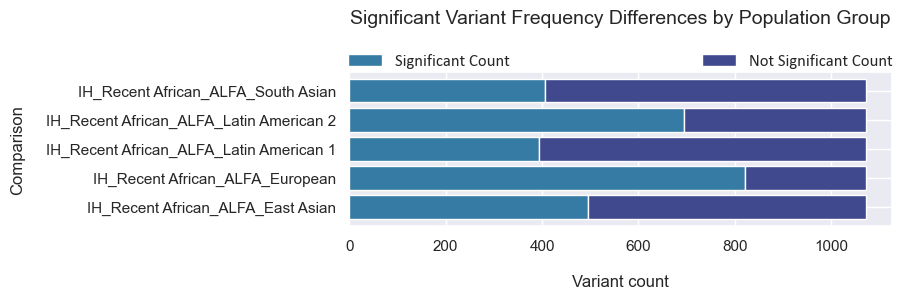

In [53]:
# Set plot figure size
sns.set(rc={"figure.figsize": (7, 2)})

# Construct horizontal bar plot
ax = significant_counts_df[["Significant Count", "Not Significant Count"]].plot(
    kind="barh", stacked=True, width=0.8, color=["#357BA3", "#40498E"]
)

# Rotate xticks
plt.xticks(rotation=0)

# Set labels
plt.xlabel("Variant count", labelpad=15)
plt.ylabel("Comparison", labelpad=15)
legend = plt.legend(
    loc="center",
    frameon=False,
    bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
    mode="expand",
    ncol=2,
    borderaxespad=-0.46,
    prop={"size": 12, "family": "Calibri"},
)

plt.title(
    "Significant Variant Frequency Differences by Population Group",
    size=constants.BIGGER_FONT,
    pad=35,
    loc="center",
)

# Save figure
plt.savefig(
    "..\Results\Figures\5c-Significant_freq_differences_global_comparison.png",
    dpi=600,
    bbox_inches="tight",
)
plt.show()

### Comparison of HIE-associated variant allele frequencies between African, European, Asian and Latin American populations

Determine which of the HIE-associated variants we have in-house African and ALFA global variant frequency data for.

In [65]:
# Select global allele frequency data for variants with HIE associations
ih_alfa_data_hie = (
    ih_alfa_data[ih_alfa_data["VAR_NAME"].isin(constants.HIE_VARIANT_RSIDS)]
    .reset_index(drop=True)
)

# Drop irrelevant data columns
ih_alfa_data_hie.drop(
    columns=[
        "ALT_CT_IH_Recent African",
        "ALT_CT_ALFA_East Asian",
        "ALT_CT_ALFA_South Asian",
        "ALT_CT_ALFA_European",
        "ALT_CT_ALFA_Latin American 1",
        "ALT_CT_ALFA_Latin American 2",
        "REF_CT_IH_Recent African",
        "REF_CT_ALFA_East Asian",
        "REF_CT_ALFA_South Asian",
        "REF_CT_ALFA_European",
        "REF_CT_ALFA_Latin American 1",
        "REF_CT_ALFA_Latin American 2",
    ],
    inplace=True,
)

print (f"We have global allele frequency data on the following variants associated with HIE:")
print(f"{ih_alfa_data_hie.VAR_NAME.unique().tolist()}")

We have global allele frequency data on the following variants associated with HIE:
['rs1071676', 'rs1217401', 'rs1800795', 'rs1800896', 'rs1801133', 'rs1808593', 'rs2043211', 'rs2067853', 'rs2070744']


Visually compare the global population allele frequencies of the HIE-associated variants 

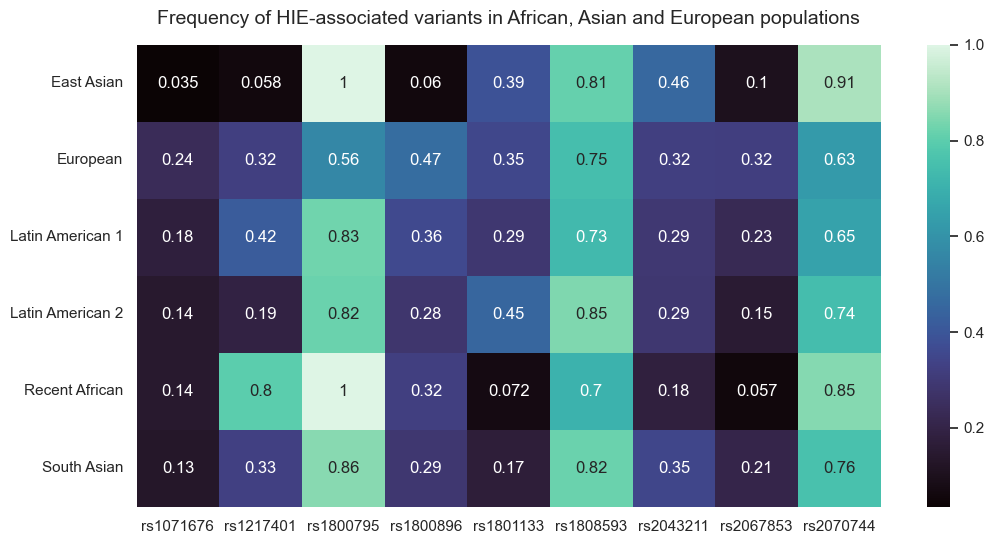

In [79]:
# Prepare the data for plotting
# Rename columns
replacements = {"ALFA_AF_": "", "IH_AF_": ""}

for key, value in replacements.items():
    ih_alfa_data_hie.columns = ih_alfa_data_hie.columns.str.replace(
        key, value
    )

# Reshape data
heatmap_data = ih_alfa_data_hie.melt(
    id_vars=["VAR_NAME", "REF", "ALT"],
    value_vars=ih_alfa_data_hie.iloc[:, 2:],
    var_name="POPULATION",
    value_name="ALT_AF",
)

heatmap_data = heatmap_data.pivot(
    index="POPULATION", columns="VAR_NAME", values="ALT_AF"
).replace(np.NaN, 0.0)

# Set figure size
sns.set(rc={"figure.figsize": (12, 6)})

# Create heatmap
sns.heatmap(heatmap_data, cmap="mako", annot=True)

# Set labels
plt.xlabel(None)
plt.ylabel(None)
plt.title(
    "Frequency of HIE-associated variants in African, Asian and European populations",
    size=constants.BIGGER_FONT,
    pad=15,
)

# Save figure
plt.savefig(
    "..\Results\Figures\5d-HIE_variant_frequency_comparisons.png",
    dpi=1200,
    bbox_inches="tight",
)

plt.show()

### Significant differences in HIE-associated variant allele counts between African, and European, Asian and Latin American populations

Extract data on HIE-associated variants with significant differences in frequency between Africans and the other global populations.

In [98]:
# Extract Fisher's Test results for HIE-associated variants
corr_fishers_results_hie = corr_fishers_results[
    corr_fishers_results["VAR_NAME"].isin(constants.HIE_VARIANT_RSIDS)
].reset_index(drop=True)

# Get a list of HIE-associated variants with significant frequency differences
sign_corr_fishers_results_hie = corr_fishers_results_hie[
    (corr_fishers_results_hie["PVALUE_IH_Recent African_ALFA_East Asian"] < 0.05)
    | (corr_fishers_results_hie["PVALUE_IH_Recent African_ALFA_European"] < 0.05)
    | (corr_fishers_results_hie["PVALUE_IH_Recent African_ALFA_South Asian"] < 0.05)
    | (corr_fishers_results_hie["PVALUE_IH_Recent African_ALFA_Latin American 1"] < 0.05)
    | (corr_fishers_results_hie["PVALUE_IH_Recent African_ALFA_Latin American 2"] < 0.05)
]

sign_hie_variants = sign_corr_fishers_results_hie.VAR_NAME.unique()
print(f"HIE-associated variants with significant differences in frequency between Africans and one or more other global population:")
print(f"{sign_hie_variants}")

HIE-associated variants with significant differences in frequency between Africans and one or more other global population:
['rs1071676' 'rs1217401' 'rs1800896' 'rs1801133' 'rs1808593' 'rs2043211'
 'rs2067853' 'rs2070744']
